#### Pós Graduação de Engenharia de Software - PUC-Rio<br/>MVP da Disciplina/Sprint: Qualidade de Software, Segurança e Sistemas Inteligentes

---
<br/>


# **Classificador de Enunciados de Questões de Vestibulares e Concursos**

### Aluno: Dirceu Cardoso Lemos Sobrinho

<br/>

---

### **Contextualização**

Na sprint 1 da disciplina Desenvolvimento Full Stack Básico, o aluno Dirceu Sobrinho desenvolveu um MVP que consistia em uma API e uma aplicação web para manter e disponibilizar questões dos tipos múltipla escolha e verdadeiro ou falso. O objetivo era validar a hipótese de que uma API com uma base de questões de concursos e vestibulares seria útil para instituições de ensino na criação de exercícios, simulados e provas online.

<br/>

###    **Problema**

Para manter uma base de questões completa e atualizada, é necessário realizar um cadastro de uma grande quantidade de questões. Esse é um esforço inviável para ser realizado manualmente. Para resolver esse problema, é a utlização de uma ferramente OCR em conjunto com um sistema inteligente que seja capaz de classificar as questões por disciplina e assunto.
<br/>

###    **Solução**

Nesse MVP da disciplina Qualidade de Software, Segurança e Sistemas Inteligentes, estamos propondo um classificador que determina se uma questão é da disciplina Português, Matemática, Direito ou Informática a partir do enunciado das questões.
<br/>

###  **Próximos passos**

Se a ferramenta se mostrar útil, poderemos evolui-la para que ela seja capaz de classificar outras disciplinas, além dos assuntos correlatos.

<br/>

###   **Dataset utilizado**

O dataset foi construído pelo próprio aluno e consiste em um conjunto de enunciados de questões de vestibulares e concursos públicos das disciplinas Português, Matemática, Direito e Informática.

<br/>


---



### **1. Configuração:**

No código abaixo realizaremos o imports necessários para criar, treinar e determinar o melhor modelo que realização da classificação das questões pelo seu enunciado.

In [1]:


# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import joblib
import pickle
#visualization
import matplotlib.pyplot as plt
# Machine Learning & Natural Language Processing
import re
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

#Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.




---



### **2. Classes utilizadas para carregamento e pré-Processamento do dataset, treinamento, avaliação e visualização dos modelos**


In [2]:
class Carregador:

    def carregar_dados(self, url: str, atributos: list):
        dataset = pd.read_csv(url, names=atributos)
        return dataset


class PreProcessador:

    def pre_processar(self, x, y, percentual_teste = 0.2, seed=7):
        # divisão em treino e teste
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=percentual_teste, random_state=seed)
        return (X_train, X_test, Y_train, Y_test)


class ProcessadorTexto:

    def tratar_texto_linguagem_natural(self, texto_original):
        texto_lowercase=texto_original.lower()
        texto_sem_caracter_especial = re.sub("[^a-zA-Z \\\]"," ",texto_lowercase)
        return self.remover_stopwords(texto_sem_caracter_especial)


    def remover_stopwords(self, texto):
        stopwords = set(nltk.corpus.stopwords.words('portuguese'))
        stopwords_contexto_app = ["correto","afirmativa","questao","afirmativas","incorreto","incorretas","nao","seguintes","opcoes", "opcao",
                          "assinale","em","um","referese","os","as","seu","seus","tem","sao","leia","observe","qual","das","de","dos",
                          "assinalar", "se", "no", "na", "do","da","para", "uma", "um", "verdadeiro", "falso", "ii", "iii", "iv",
                          "preciso", "precisa", "atraves", "utilizam", "leia", "durante", "exemplo", "figura", "alternativas", "abaixo",
                          "refere", "ao", "contexto", "muito", "importante", "pois", "seguinte", "dentro", "fora", "antes", "depois",
                          "imagem", "oriundo", "oriundos", "aberto", "fechado", "abertos", "dispoe", "sobre", "sob", "abaixo", "acima",
                          "como", "novo", "nova", "por", "quer", "queria", "pratica", "qual", "condicao", "condicoes", "suponha",
                          "nesse", "nesses", "nessa", "nessas", "neste","nestes","nestas","nesta","essa","esse","essas","esses","pode",
                          "podem", "por", "para","possui","possuem","geral","geralmente","normal","normalmente","eventual","eventualmente",
                          "momento", "proximo","longe", "cujo", "cujos", "cujas", "cuja", "que", "quem", "quais", "apresenta","apresentou",
                          "especial", "especiais","mulher","homem","mulheres","meninos","meninas", "homens","menino", "menina", "praticamente",
                          "com", "contra", "mesmo", "mesma", "tendo", "cada", "ate", "bem", "mal", "bom", "entre", "significa"]

        palavras = nltk.word_tokenize(texto)

        enunciado_sem_stopwords = [palavra for palavra in palavras if not palavra in stopwords_contexto_app]
        enunciado_sem_stopwords = [palavra for palavra in enunciado_sem_stopwords if not palavra in stopwords]
        return " ".join(enunciado_sem_stopwords)


class Modelo:

    def treinar_SVM(self, X_train, Y_train):
        # Cria e treina um modelo SVM
        modelo = SVC()
        modelo.fit(X_train, Y_train)
        return modelo


    def treinar_KNN(self, X_train, Y_train):
        # Cria e treina um modelo KNN
        modelo = KNeighborsClassifier()
        modelo.fit(X_train, Y_train)
        return modelo


    def treinar_CART(self, X_train, Y_train):
        # Cria e treina um modelo CART
        modelo = DecisionTreeClassifier()
        modelo.fit(X_train, Y_train)
        return modelo


    def treinar_NB(self, X_train, Y_train):
        # Cria e treina um modelo SVM
        modelo = GaussianNB()
        modelo.fit(X_train, Y_train)
        return modelo


class Avaliador:

    def avaliar_acuracia(self, modelo, X_test, Y_test):
        resultado =  cross_val_score(modelo, X_test, Y_test, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=7), scoring='accuracy')
        return resultado


class Visualizador:

    #Boxplot de comparação dos modelos
    def comparacao_modelos(self, nomes, resultados):
        fig = plt.figure(figsize=(15,10))
        fig.suptitle('Comparação dos Modelos')
        ax = fig.add_subplot(111)
        plt.boxplot(resultados)
        ax.set_xticklabels(nomes)
        plt.show()

class Exportador:

    def exportar_joblib(self, modelo):
          filename = 'modelo_finalizado.joblib'
          joblib.dump(modelo, filename)

    def exportar_pkl(self, modelo):
          filename = 'modelo_finalizado.pkl'
          pickle.dump(modelo, open(filename, 'wb'))





## **Execução do Programa**


### Carregando o dataset

In [4]:
carregador = Carregador()
url_dados = ('https://raw.githubusercontent.com/dirceus/pos-grad-mvp2-modelo-classificador-questoes/main/datasets/dataset_enunciados2.csv')
atributos = ['enunciado','disciplina','id_disciplina']
dataset = carregador.carregar_dados(url_dados,atributos)

#imprime a quantidade de questões por disciplina do dataset
dataset.disciplina.value_counts()


MATEMATICA     225
INFORMATICA    168
PORTUGUES      142
DIREITO        129
Name: disciplina, dtype: int64

###Pré-processamento

In [5]:
pre_processador = PreProcessador()
processador_texto = ProcessadorTexto()

lista_enunciados_tratados=[]
for enunciado in dataset.enunciado:
    enunciado_tratado = processador_texto.tratar_texto_linguagem_natural(enunciado)
    lista_enunciados_tratados.append(enunciado_tratado)


cou_vec=CountVectorizer(max_features=10000)
sparce_matrix=cou_vec.fit_transform(lista_enunciados_tratados).toarray()
all_words=cou_vec.get_feature_names_out()
print("Primeiras 50 palavras: ",all_words[0:50])

y = dataset.iloc[:,1].values
x= sparce_matrix

X_train, X_test, Y_train, Y_test = pre_processador.pre_processar(x, y)


Primeiras 50 palavras:  ['aaron' 'ab' 'aba' 'abandono' 'abastecer' 'abastecido' 'abastecimento'
 'abc' 'aberta' 'abertas' 'abnt' 'abolida' 'abolir' 'aborda' 'abordado'
 'abordam' 'abordar' 'abp' 'abr' 'abra' 'abrangem' 'abri' 'abrigar'
 'abril' 'abrir' 'abriu' 'absoluta' 'absolutas' 'absoluto' 'absor'
 'absten' 'abuso' 'ac' 'acabava' 'acabou' 'acad' 'acamado' 'acarreta'
 'acaso' 'acb' 'aceit' 'aceitar' 'acerca' 'acerola' 'acertar' 'acervo'
 'acess' 'acessado' 'acessados' 'acessam']


### Treinar modelos nos algoritimos SVM, CART, KNN e Naives-Bayes

In [6]:
modelo = Modelo()

# Treinando os modelos e adicionando-os na lista de modelos
modelos = []
modelos.append(('KNN', modelo.treinar_KNN(X_train, Y_train)))
modelos.append(('CART', modelo.treinar_CART(X_train, Y_train)))
modelos.append(('NB', modelo.treinar_NB(X_train, Y_train)))
modelos.append(('SVM', modelo.treinar_SVM(X_train, Y_train)))

### Avaliar algoritmos treinados

In [7]:
avaliador = Avaliador()

resultados = []
nomes_algoritmos = []

# Avaliação dos modelos
for v_nome, v_modelo in modelos:
    cv_results = avaliador.avaliar_acuracia(v_modelo, X_test, Y_test)
    resultados.append(cv_results)
    nomes_algoritmos.append(v_nome)
    msg = "%s: %f (%f)" % (v_nome, cv_results.mean(), cv_results.std())
    print(msg)



KNN: 0.547802 (0.108676)
CART: 0.752198 (0.127739)
NB: 0.850549 (0.055590)
SVM: 0.669231 (0.136432)


###Comparação de Modelos

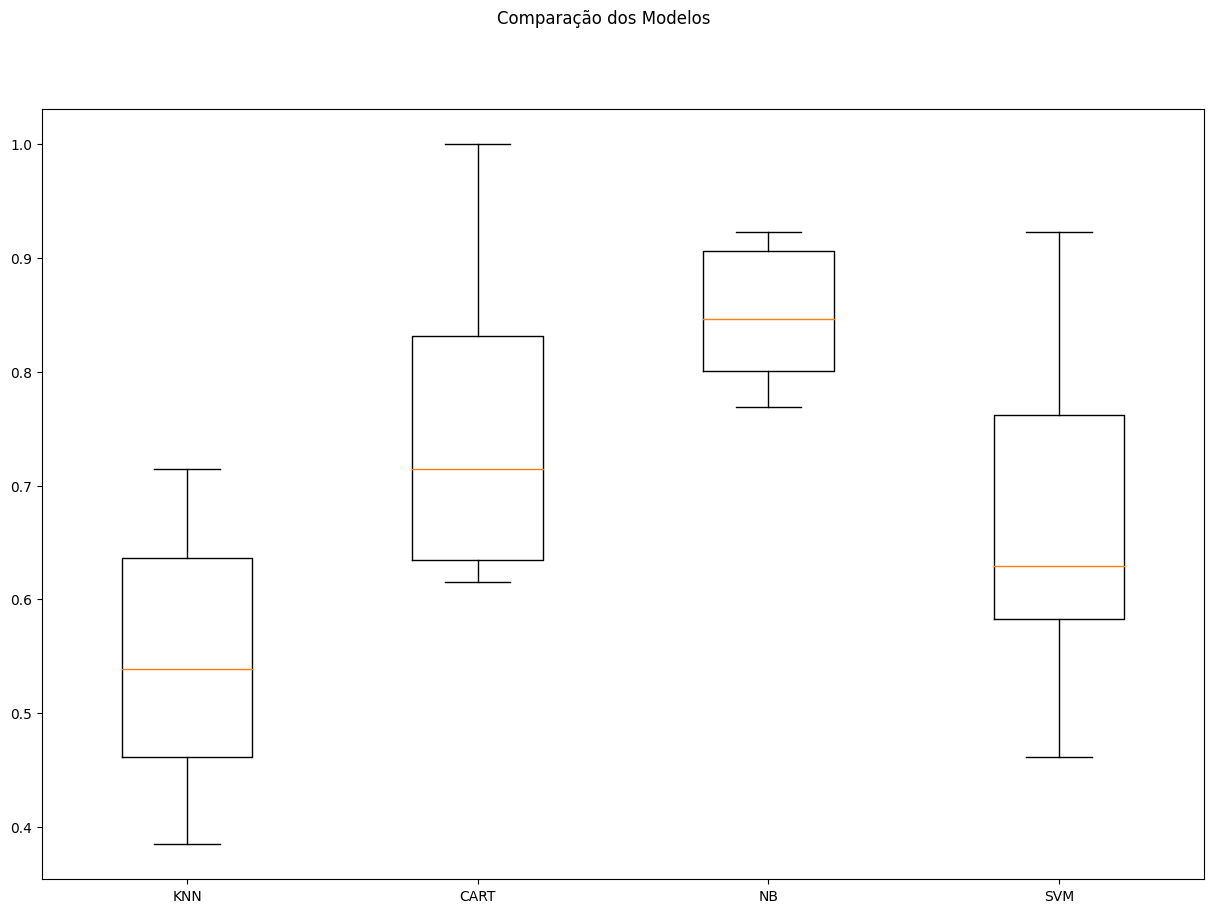

In [8]:
visualizador = Visualizador()
visualizador.comparacao_modelos(nomes_algoritmos, resultados)



###Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.516 (0.061)
CART-orig: 0.815 (0.056)
NB-orig: 0.910 (0.039)
SVM-orig: 0.798 (0.048)
KNN-padr: 0.258 (0.085)
CART-padr: 0.836 (0.056)
NB-padr: 0.848 (0.052)
SVM-padr: 0.633 (0.036)
KNN-norm: 0.516 (0.099)
CART-norm: 0.813 (0.053)
NB-norm: 0.889 (0.050)
SVM-norm: 0.685 (0.027)


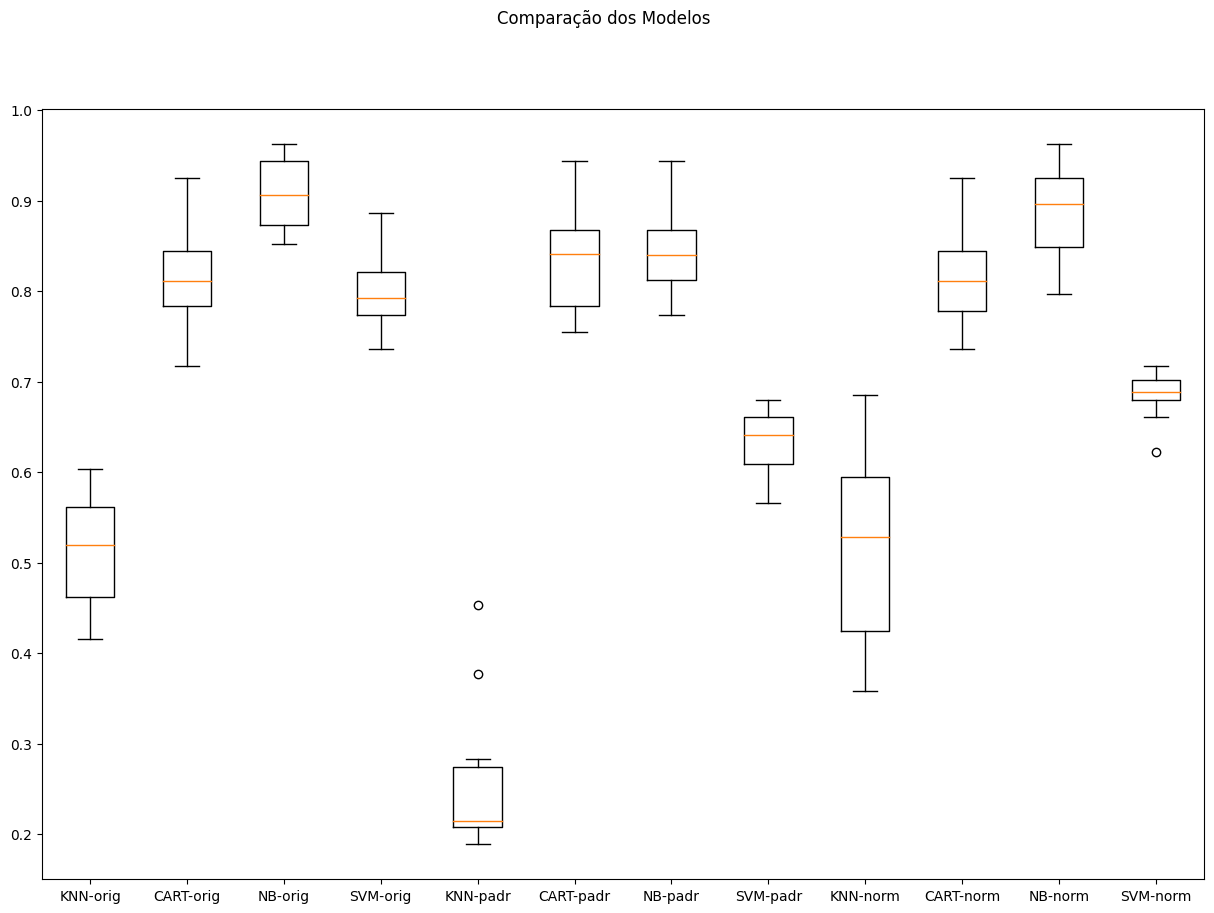

In [9]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = avaliador.avaliar_acuracia(model, X_train, Y_train)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
visualizador.comparacao_modelos(names, results)

###Otimização dos hiperparâmetros

In [10]:
# Tuning
np.random.seed(7) # definindo uma semente global para este bloco
pipelines = []

# Definindo os componentes do pipeline
nb = ('nb', GaussianNB())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('nb-orig', Pipeline(steps=[nb])))
pipelines.append(('nb-padr', Pipeline(steps=[standard_scaler, nb])))
pipelines.append(('nb-norm', Pipeline(steps=[min_max_scaler, nb])))

nb_param_grid = {'nb__priors': [None], 'nb__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}
param_grid = nb_param_grid


# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=7), scoring='accuracy')
    grid.fit(X_train, Y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: nb-orig - Melhor: 0.909713 usando {'nb__priors': None, 'nb__var_smoothing': 1e-08}
Sem tratamento de missings: nb-padr - Melhor: 0.847519 usando {'nb__priors': None, 'nb__var_smoothing': 1e-08}
Sem tratamento de missings: nb-norm - Melhor: 0.889064 usando {'nb__priors': None, 'nb__var_smoothing': 1e-08}


### Finalização do Modelo

In [11]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
#modeloFinal = SVC(C=10, gamma=0.001, kernel='rbf')
modeloFinal = GaussianNB(priors=None, var_smoothing=1e-08)
modeloFinal.fit(rescaledX, Y_train)
# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = modeloFinal.predict(rescaledTestX)
print(accuracy_score(Y_test, predictions))

0.7969924812030075


In [12]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(x) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(x) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('nb', GaussianNB())])

## Simulando a aplicação do modelo em dados não vistos

In [13]:
#Novos dados - não sabemos a disciplina!

novo_dados = [
  #INFORMATICA
  processador_texto.tratar_texto_linguagem_natural("Acerca dos conceitos, das formas de uso e das ferramentas do ambiente Windows, julgue o item que se segue. O Explorador de Arquivos é a ferramenta do Windows utilizada para a navegação em arquivos da Internet."),
  processador_texto.tratar_texto_linguagem_natural("Você está acessando uma máquina Linux e necessita saber qual lista dos módulos do Kernel foram carregados. Para tanto, você fez login com o root e deverá aplicar o comando:"),
  #PORTUGUES
  processador_texto.tratar_texto_linguagem_natural("É comum coexistirem sequências tipológicas em um mesmo gênero textual. Nesse fragmento, os tipos textuais que se destacam na organização temática são"),
  processador_texto.tratar_texto_linguagem_natural("As expressões em destaque, sintaticamente, podem ser classificadas como:"),
  #MATEMATICA
  processador_texto.tratar_texto_linguagem_natural("O gráfico apresenta a evolução do crescimento de uma determinada árvore, plantada a partir de uma muda com 1 metro de altura. Nessa evolução, a altura da árvore, em metro, é descrita em função do tempo, medido em ano. Imagem associada para resolução da questão No período de 1 ano, contado a partir do instante em que a árvore tinha dois anos e meio de plantio, a variação da altura dessa árvore, em metro, teve valor compreendido entre"),
  processador_texto.tratar_texto_linguagem_natural("Sobre um grupo de atletas sabe-se que 15 praticam natação, atletismo e ciclismo, 20 praticam somente natação e atletismo, 27 praticam somente natação e ciclismo, e 25 praticam somente atletismo e ciclismo. Se 70 atletas desse grupo praticam natação, 61 praticam atletismo, e 75 praticam ciclismo, então é verdade que, das alternativas a seguir, a que contém a porcentagem que mais se aproxima da relação entre o número de atletas que praticam um único esporte o número total de atletas desse grupo é"),
  #DIREITO
  processador_texto.tratar_texto_linguagem_natural("Conforme preconizado pelos princípios constitucionais, a atuação dos servidores públicos deve ser pautada pela conduta moral e ética, sendo vedado qualquer tipo de discriminação por sexo, raça, cor, idade ou qualquer outra forma discriminatória. O atendimento ao cidadão deve ser realizado de forma humanizada. A ação do servidor público deve ocorrer de forma igualitária, com dignidade e respeito. Assinale a alternativa que relaciona corretamente dois dos princípios constitucionais que embasam as afirmações anteriores."),
  processador_texto.tratar_texto_linguagem_natural("A Constituição Federal prevê como funções essenciais à administração da Justiça o Ministério Público, a Advocacia pública e privada, estabelecendo que"),
]

cou_vec_test  = CountVectorizer(vocabulary=all_words)
X_novos_dados = cou_vec_test.fit_transform(novo_dados)

entrada = pd.DataFrame(X_novos_dados.toarray(), columns=all_words)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:10000].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)


[[-0.03883678 -0.03883678 -0.06244278 ... -0.06736897 -0.10427988
  -0.03883678]
 [-0.03883678 -0.03883678 -0.06244278 ... -0.06736897 -0.10427988
  -0.03883678]
 [-0.03883678 -0.03883678 -0.06244278 ... -0.06736897 -0.10427988
  -0.03883678]
 ...
 [-0.03883678 -0.03883678 -0.06244278 ... -0.06736897 -0.10427988
  -0.03883678]
 [-0.03883678 -0.03883678 -0.06244278 ... -0.06736897 -0.10427988
  -0.03883678]
 [-0.03883678 -0.03883678 -0.06244278 ... -0.06736897 -0.10427988
  -0.03883678]]


In [17]:
saidas = model.predict(rescaledEntradaX)
esperados = ["INFORMATICA", "INFORMATICA", "PORTUGUES", "PORTUGUES", "MATEMATICA", "MATEMATICA", "DIREITO", "DIREITO"]
print("Resultado:")

contador = 0
for saida in saidas:
    print("Resultado: "+saida + " - Esperado: " + esperados[contador])
    contador += 1


Resultado:
Resultado: INFORMATICA - Esperado: INFORMATICA
Resultado: INFORMATICA - Esperado: INFORMATICA
Resultado: PORTUGUES - Esperado: PORTUGUES
Resultado: PORTUGUES - Esperado: PORTUGUES
Resultado: MATEMATICA - Esperado: MATEMATICA
Resultado: MATEMATICA - Esperado: MATEMATICA
Resultado: DIREITO - Esperado: DIREITO
Resultado: DIREITO - Esperado: DIREITO


### Exportação do modelo

In [18]:
exportador = Exportador()
exportador.exportar_joblib(model)
exportador.exportar_pkl(model)

#salvar palavras em arquivo
with open("allwords.txt", "w") as txt_file:
    for line in all_words:
        txt_file.write("".join(line) + "\n")
txt_file.close()


## **Conclusão**

O modelo a partir do algoritmo de Naives Bayes apresentou a melhor acurácia, e portanto utilizaremos ele na API de cadastro de questões.